In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
# import catboost
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# reading the file

properties = pd.read_csv('rentals.csv')
properties.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [4]:
# Dropping irrrelevant columns

properties = properties.drop('id', axis='columns')

# dropping null values

properties = properties.dropna()

# Examining the new dataset
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        8095 non-null   float64
 1   longitude       8095 non-null   float64
 2   property_type   8095 non-null   object 
 3   room_type       8095 non-null   object 
 4   bathrooms       8095 non-null   float64
 5   bedrooms        8095 non-null   float64
 6   minimum_nights  8095 non-null   int64  
 7   price           8095 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 569.2+ KB


In [5]:
# Looking for categorical columns in the object dtype
properties.nunique()

latitude          5053
longitude         5173
property_type       26
room_type            4
bathrooms           17
bedrooms            10
minimum_nights      53
price              526
dtype: int64

In [6]:
# Converting object dtype to categorical values
properties['property_type'] = properties.property_type.astype('category')
properties['room_type'] = properties.room_type.astype('category')

properties.head()


,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [7]:
# Cleaning the price column

properties['price'] = properties.price.str.replace('$', '', regex=True).str.replace(',', '',regex=True)
properties['price'] = pd.to_numeric(properties.price)
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8095 entries, 0 to 8110
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   latitude        8095 non-null   float64 
 1   longitude       8095 non-null   float64 
 2   property_type   8095 non-null   category
 3   room_type       8095 non-null   category
 4   bathrooms       8095 non-null   float64 
 5   bedrooms        8095 non-null   float64 
 6   minimum_nights  8095 non-null   int64   
 7   price           8095 non-null   float64 
dtypes: category(2), float64(5), int64(1)
memory usage: 460.0 KB


In [8]:
# Encoding categorical values
properties2 = pd.get_dummies(properties, columns = ['property_type', 'room_type'])

In [9]:
# chooseing features and target variables

x = properties2.drop('price', axis=1)
y = properties2['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [10]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)
# print('R2 Squared score: ',lr.score(x_test,y_test))
# y_pred = lr.predict(x_test)
# print('Mean Squared Error: ', MSE(y_test,y_pred))
# print(lr.intercept_)

def linear_model(a,b,c,d):
    lr = LinearRegression()
    lr.fit(a,b)
    y_pred = lr.predict(c)
    Mean_error = MSE(d, y_pred)
    score = lr.score(c,d)
    RMSE = Mean_error * (1/2)
    coef = lr.coef_
    intercept = lr.intercept_
    g = f'MSE: {Mean_error}'
    h = f'R2 score: {score}'
    e = f'Coefficients: {coef}'
    f = f'Intercept: {intercept}'
    return e, f, g, h

linear_model(x_train,y_train,x_test,y_test)
    

('Coefficients: [ 1.33296328e+03  1.68880946e+02  4.84580096e+00  1.12685853e+02\n -3.48002957e-07 -7.09397426e+01 -6.60721889e+01 -1.20354464e+01\n  2.64084074e+02 -6.69990418e+01 -1.35098828e+02 -1.29723394e+02\n -4.15271906e+01 -3.35733005e+01 -7.34270904e+00 -1.91051957e+02\n  2.18611758e+02 -6.34157108e+01 -4.33046472e+01 -4.64177028e+01\n  1.28942531e+02 -4.71738725e+01 -8.86783945e+01  3.78503141e+01\n -9.66122821e-01 -3.35727464e+00  3.25645188e+02  7.58224636e+00\n -1.02783982e+02  2.97141511e+00  1.64773978e+02  9.86897828e+01\n -8.35749300e+01  3.21307007e+01 -4.72455535e+01]',
 'Intercept: -29625.8006096972',
 'MSE: 201179.0584503936',
 'R2 score: 0.09825696605152201')

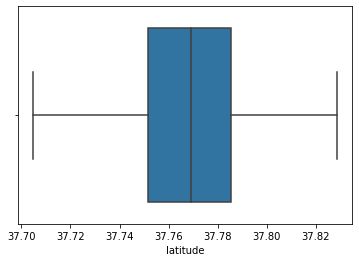

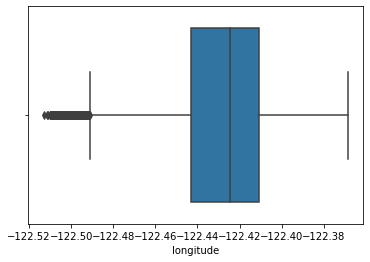

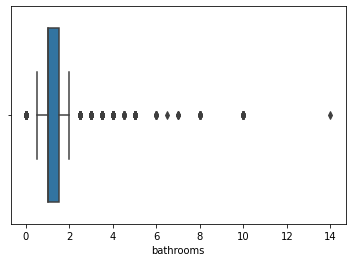

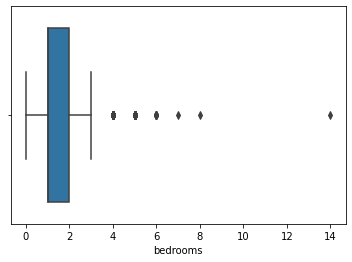

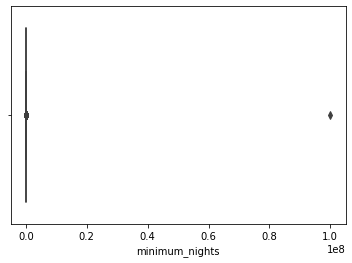

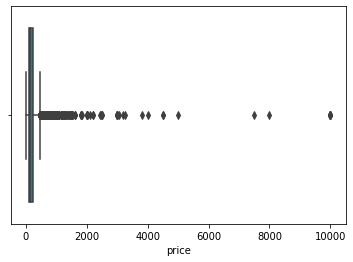

In [11]:
for i in properties.columns:
    if properties[f'{i}'].dtype != 'category':
            sns.boxplot(x=i, data=properties)
            plt.show()

In [12]:
night = properties[properties['minimum_nights'] >150].index

In [13]:
pric = properties[properties['price'] >500].index

In [14]:
bed = properties[properties['bedrooms'] >3].index

In [15]:
bath = properties[properties['bathrooms'] >3].index

In [16]:
# prop = properties[properties['bathrooms'] > properties['bedrooms']].index

In [17]:
prin = set(night).union(set(pric), set(bed), set(bath))
print(len(prin))

841


In [18]:
properties_filter = properties.drop(prin, axis=0)
properties_filter

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,37.75402,-122.45805,House,Private room,1.0,1.0,1,99.0
2,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,235.0
6,37.75919,-122.42237,Condominium,Private room,1.0,1.0,1,139.0
7,37.76259,-122.40543,House,Private room,1.0,1.0,1,135.0
...,...,...,...,...,...,...,...,...
8105,37.70463,-122.46288,House,Private room,0.0,1.0,1,100.0
8107,37.77799,-122.42159,Condominium,Entire home/apt,1.0,1.0,1,200.0
8108,37.73410,-122.38917,Hut,Private room,2.0,1.0,30,69.0
8109,37.78144,-122.41207,Apartment,Entire home/apt,1.0,1.0,30,187.0


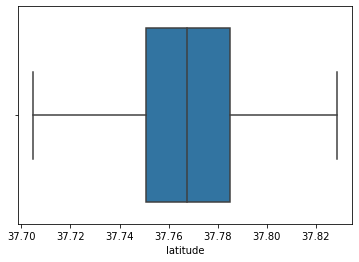

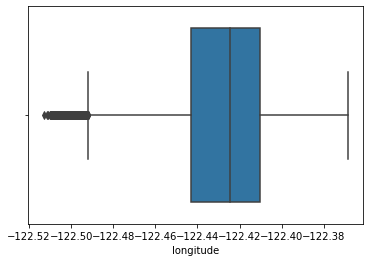

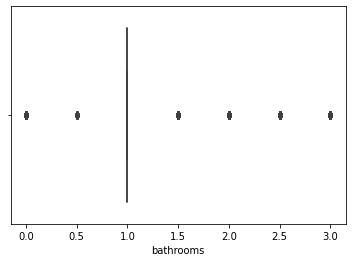

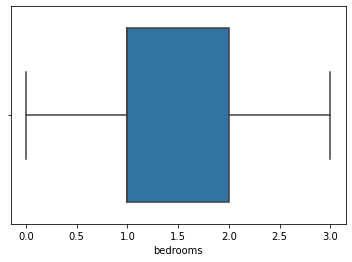

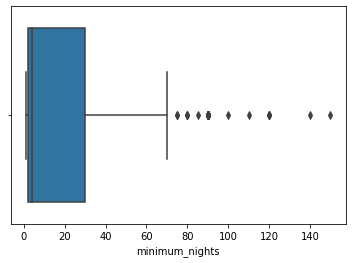

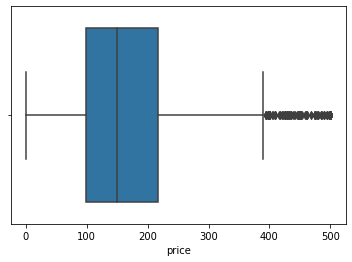

In [19]:
for ing in properties.columns:
    if properties[f'{ing}'].dtype != 'category':
            sns.boxplot(x=ing, data=properties_filter)
            plt.show()

In [20]:
properties_filter.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.180403,-0.012643,-0.139484,0.192738,0.156208
longitude,0.180403,1.000000,-0.034331,-0.115094,0.110133,0.063090
bathrooms,-0.012643,-0.034331,1.000000,0.450348,0.063238,0.261548
bedrooms,-0.139484,-0.115094,0.450348,1.000000,0.003202,0.504971
minimum_nights,0.192738,0.110133,0.063238,0.003202,1.000000,-0.138374
price,0.156208,0.063090,0.261548,0.504971,-0.138374,1.000000


In [21]:
properties.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,0.187000,0.078469,-0.108647,-0.007415,0.083231
longitude,0.187000,1.000000,0.007627,-0.115893,0.002028,0.015867
bathrooms,0.078469,0.007627,1.000000,0.327916,-0.004766,0.081981
bedrooms,-0.108647,-0.115893,0.327916,1.000000,-0.004159,0.262343
minimum_nights,-0.007415,0.002028,-0.004766,-0.004159,1.000000,-0.004247
price,0.083231,0.015867,0.081981,0.262343,-0.004247,1.000000


In [22]:
properties_filter.skew()

C:\Users\Austin\AppData\Local\Temp\ipykernel_27588\546600108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.422105
longitude        -0.957425
bathrooms         1.790378
bedrooms          0.708931
minimum_nights    1.047505
price             1.167452
dtype: float64

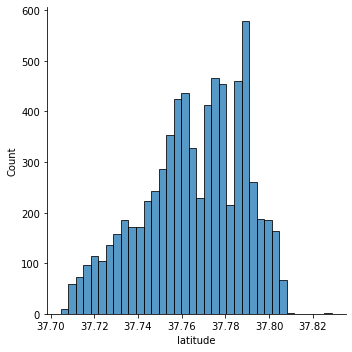

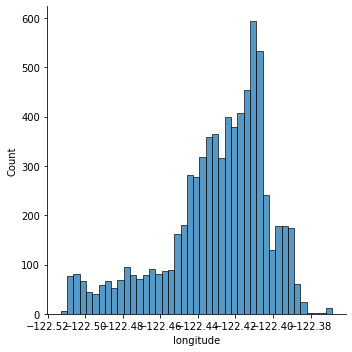

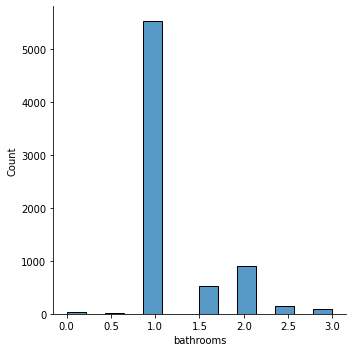

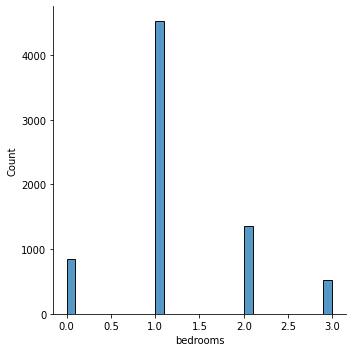

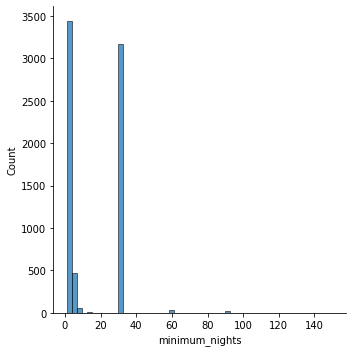

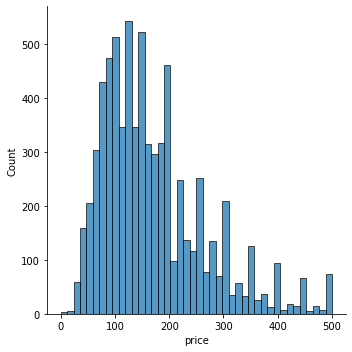

In [23]:
for dis in properties.columns:
    if properties[f'{dis}'].dtype != 'category':
        # if dis != 'minimum_nights':
            sns.displot(properties_filter[f'{dis}'])
            plt.show()

In [24]:
properties_filter[(properties_filter.bedrooms == 0) & (properties_filter.bathrooms==0)].head(60)

,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price


In [25]:
len(properties_filter[properties_filter.bathrooms == 0])

38

In [26]:
# 7022
properties_filter = properties_filter.drop(7022, axis=0)

In [27]:
log_target = np.log1p(properties_filter["price"])
log_target.skew()

-0.3031618290437542

In [28]:
# Removing nil prices value
properties_filter = properties_filter.drop(properties_filter[properties_filter.price <=0].index, axis=0)


-0.4236748575562939


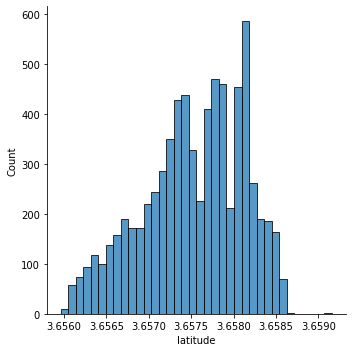

0.08126578358804372


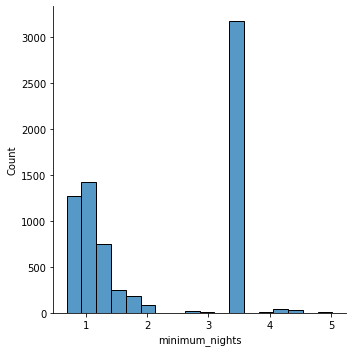

-0.21535285334114584


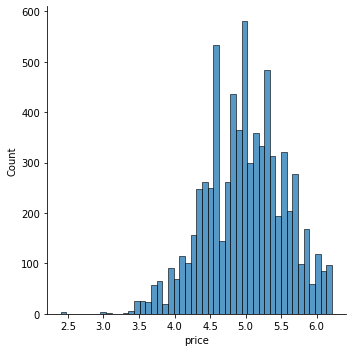

In [29]:
for trans in properties.columns:
    if properties[f'{trans}'].dtype != 'category':
        if trans == 'price' or trans == 'minimum_nights' or trans == 'latitude':
            properties_filter[f'{trans}'] = np.log1p(properties_filter[f'{trans}'])
            print(properties_filter[f'{trans}'].skew())
            sns.displot(properties_filter[f'{trans}'])
            plt.show()

0.47905698181999706


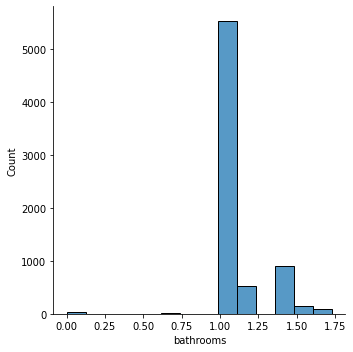

-1.0208269425538075


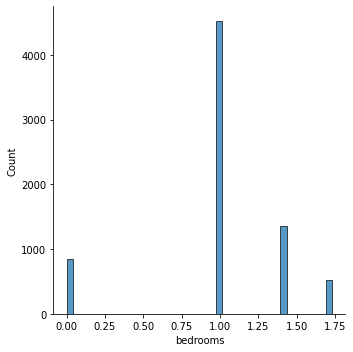

In [30]:
for trans2 in properties.columns:
    if properties[f'{trans2}'].dtype != 'category':
        if trans2 == 'bedrooms' or trans2 == 'bathrooms':
            properties_filter[f'{trans2}'] = properties_filter[f'{trans2}']**(1/2)
            print(properties_filter[f'{trans2}'].skew())
            sns.displot(properties_filter[f'{trans2}'])
            plt.show()

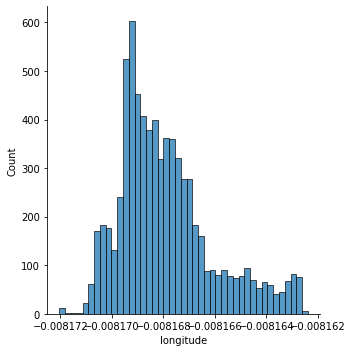

In [31]:
properties_filter['longitude'] = 1/properties_filter['longitude']
sns.displot(properties_filter['longitude'])

In [32]:
properties_filter.skew()

C:\Users\Austin\AppData\Local\Temp\ipykernel_27588\546600108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  properties_filter.skew()


latitude         -0.423675
longitude         0.956062
bathrooms         0.479057
bedrooms         -1.020827
minimum_nights    0.081266
price            -0.215353
dtype: float64

In [33]:
properties_filter.corr()

,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
latitude,1.000000,-0.180470,-0.023074,-0.163406,0.200922,0.175555
longitude,-0.180470,1.000000,0.038778,0.128682,-0.120622,-0.078157
bathrooms,-0.023074,0.038778,1.000000,0.350655,0.073411,0.182198
bedrooms,-0.163406,0.128682,0.350655,1.000000,-0.007861,0.338091
minimum_nights,0.200922,-0.120622,0.073411,-0.007861,1.000000,-0.120626
price,0.175555,-0.078157,0.182198,0.338091,-0.120626,1.000000


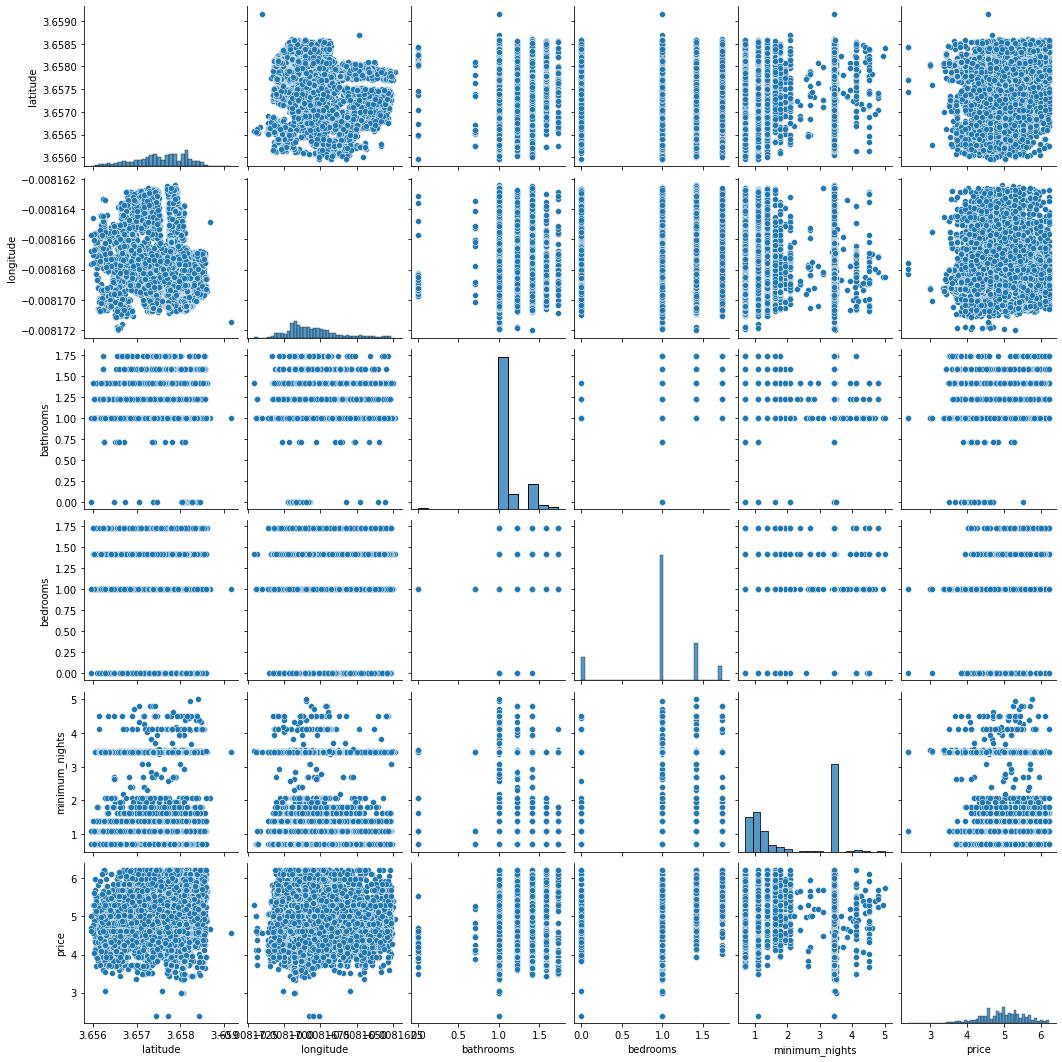

In [34]:
sns.pairplot(data=properties_filter)

In [35]:
# Encoding categorical values
properties_filter = pd.get_dummies(properties_filter, columns = ['property_type', 'room_type'])

In [36]:
# chooseing features and target variables

filter_x = properties_filter.drop('price', axis=1).values
filter_y = properties_filter['price'].values

filter_x_train, filter_x_test, filter_y_train, filter_y_test = train_test_split(filter_x, filter_y, test_size=0.2, random_state=42)
filter_x

array([[ 3.65762895, -0.00816768,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.65723449, -0.00816606,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.65700455, -0.00816853,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.65672035, -0.00817066,  1.41421356, ...,  0.        ,
         1.        ,  0.        ],
       [ 3.65794178, -0.00816913,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.65602227, -0.00816672,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [233]:
linear_model(filter_x_train, filter_y_train, filter_x_test, filter_y_test)

('Coefficients: [ 1.82898837e+02 -2.44287075e+04  3.14115771e-01  3.82759914e-01\n -1.26282393e-01  8.35032510e-02  2.13369382e-02 -2.98870893e-02\n  4.28204844e-01 -7.62058706e-02 -3.87235978e-01 -1.65264383e+00\n -3.39567027e-01  1.18256995e-01  1.71025994e-01 -3.46700175e-01\n  8.87056988e-02 -7.54096676e-02 -2.37720465e-02 -2.70647957e-01\n  3.96867879e-01  4.44856387e-02 -1.46724191e-08  2.08592656e-01\n  2.30432732e-01  4.08477717e-01  9.20579909e-01 -3.89362458e-03\n -1.09557143e-02  2.83184170e-02  6.81295614e-02  6.81468902e-01\n  8.63274445e-03  8.82582931e-02 -7.78359870e-01]',
 'Intercept: -864.4162331013385',
 'MSE: 0.14826162113203745',
 'R2 score: 0.5264816095849068')

In [38]:
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge

alp = np.arange(0,1,0.1)
ride = []

for alph in alp:
    model = Ridge(alpha=alph)
    model.fit(filter_x_train, filter_y_train)
    model_pred = model.predict(filter_x_test)
    ride.append(MSE(filter_y_test,model_pred))
ride

In [40]:
plt.figure(figsize=(15,12))
plt.plot(alp,ride)
plt.show()

In [ ]:
ridges = dict(zip(ride,alp))
ridges[min(ridges.keys())]

In [247]:
from sklearn.ensemble import RandomForestRegressor

fori = []

xw = np.arange(1,50,1)

for forest in xw:
    rfr = RandomForestRegressor(n_estimators=481, max_depth=forest)
    rfr.fit(filter_x_train, filter_y_train)
    filter_pred = rfr.predict(filter_x_test)
    fori.append(MSE(filter_y_test, filter_pred))

fori

[0.21270967887976844,
 0.18418709876319347,
 0.16468493529088854,
 0.15010116451940594,
 0.13952940807688027,
 0.1312830786613738,
 0.12471929165781105,
 0.11937237325637973,
 0.11576434580729326,
 0.11344153356296333,
 0.11230323189682839,
 0.11148312979096704,
 0.11065180880217115,
 0.11029284685089896,
 0.1103809333703726,
 0.11045075079132981,
 0.1106319644399355,
 0.11071539477645426,
 0.11018022180461486,
 0.11067272731055097,
 0.11028130714125742,
 0.11040149258274504,
 0.11001440136835255,
 0.1107557753994473,
 0.10971329346764627,
 0.11085971327965,
 0.11034489313540437,
 0.1108153615610898,
 0.11048752353343483,
 0.11110036945137851,
 0.11058534522493883,
 0.11114571541125719,
 0.11049434155370987,
 0.11100219881486907,
 0.11098991377110115,
 0.11070146091747186,
 0.1105095502781174,
 0.11090382380801117,
 0.1105382959825229,
 0.11092349131851864,
 0.11131282827022417,
 0.11079607385611581,
 0.11062103387013006,
 0.11062302422840209,
 0.11054468350368708,
 0.1106446875907021,

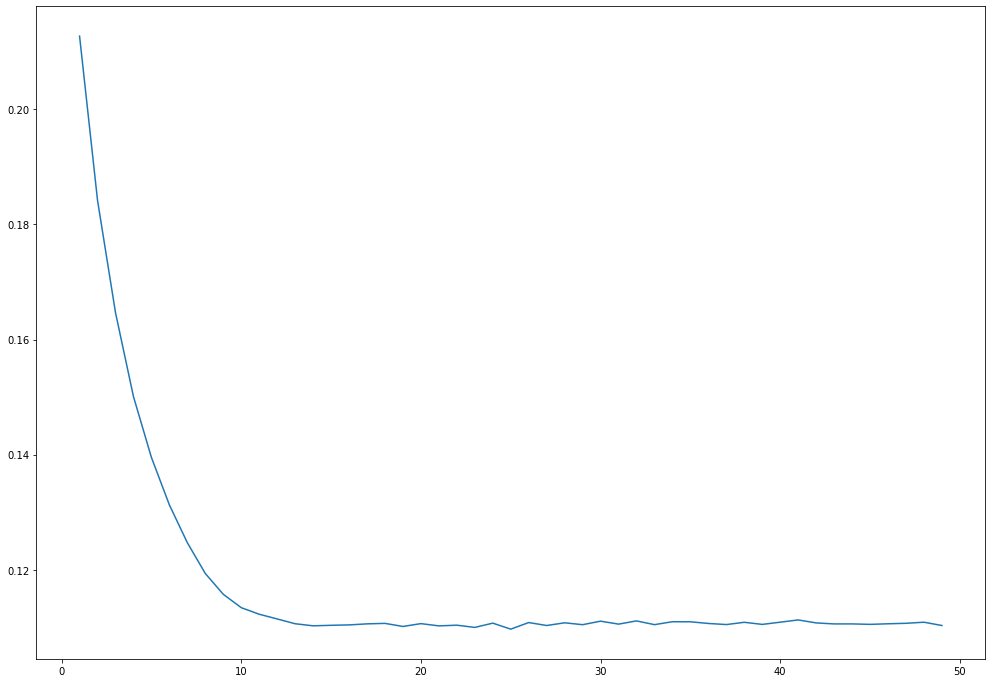

In [248]:
plt.figure(figsize=(17,12))
plt.plot(xw, fori)
plt.show()

In [249]:
rfrd = dict(zip(fori,xw))
rfrd[min(rfrd.keys())]


25

In [250]:
rfr = RandomForestRegressor(n_estimators=489,max_depth=25)
rfr.fit(filter_x_train, filter_y_train)
filter_pred = rfr.predict(filter_x_test)
MSE(filter_y_test, filter_pred)

0.11049244899918043

In [252]:
rfr = RandomForestRegressor(n_estimators=481, max_depth=25)
rfr.fit(filter_x_train, filter_y_train)
filter_pred = rfr.predict(filter_x_test)
MSE(filter_y_test, filter_pred)

0.11038271800246968

In [253]:
rfr.score(filter_x_test, filter_y_test)

0.6474593589420958

In [270]:
rfr.score(filter_x_train, filter_y_train)

0.9469220654514788

In [279]:
from sklearn.ensemble import GradientBoostingRegressor

fori2 = []

xw = np.arange(1,50,1)

for grad in xw:
    gbr = GradientBoostingRegressor(n_estimators=300, max_depth=grad)
    gbr.fit(filter_x_train, filter_y_train)
    filter_pred = rfr.predict(filter_x_test)
    fori2.append(MSE(filter_y_test, filter_pred))

fori2

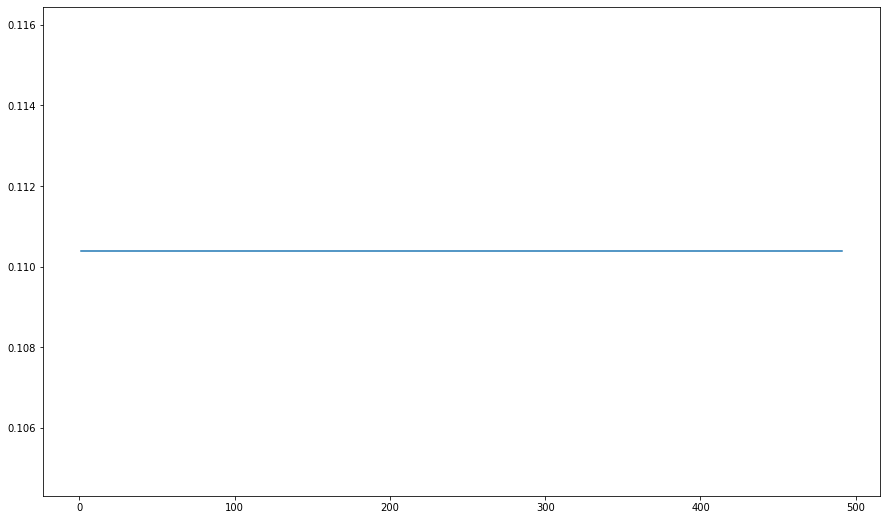

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(xw,fori2)
plt.show()

In [47]:
gbr = GradientBoostingRegressor(n_estimators=300)
gbr.fit(filter_x_train, filter_y_train)
filter_pred = rfr.predict(filter_x_test)
MSE(filter_y_test, filter_pred)

0.1107197435875829

In [48]:
gbr.score(filter_x_test, filter_y_test)

0.6283402220318245

In [272]:
gbr.score(filter_x_train, filter_y_train)

0.6980525735411018

In [49]:
from sklearn.neighbors import KNeighborsRegressor


knr = KNeighborsRegressor(n_neighbors=200)
knr.fit(filter_x_train, filter_y_train)
print("KNN Score: ", knr.score(filter_x_train, filter_y_train))
print("KNN Test Score: ", knr.score(filter_x_test, filter_y_test))

KNN Score:  0.5140501559588828
KNN Test Score:  0.4879655553383895


In [278]:
GradientBoostingRegressor?


Init signature:
GradientBoostingRegressor(
    *,
    loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss

In [51]:
filter_x_test.shape

(1451, 35)

In [52]:
# X_ax = np.arange(-2,10001,0.0001)
# y_ax = X_ax **2

# plt.figure(figsize=(12,7))
# plt.plot(X_ax,y_ax)
# plt.show()

In [53]:
# # Instantiate a Sequential model
# model = Sequential()

# # Add a Dense layer with 50 neurons and an input of 1 neuron
# model.add(Dense(50, input_shape=(35,), activation='relu'))

# # Add two Dense layers with 50 neurons and relu activation
# model.add(Dense(50,activation='relu'))
# model.add(Dense(50,activation='relu'))


# # End your model with a Dense layer and no activation
# model.add(Dense(1))

In [54]:
# # Compile your model
# model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

# print("Training started..., this can take a while:")

# # Fit your model on your data epochs
# model.fit(filter_x_train, filter_y_train, epochs = 20, verbose=1,
#           validation_data=(filter_x_test, filter_y_test))

# # Evaluate your model 
# print("Final loss value:",model.evaluate(filter_x_test, filter_y_test, verbose=0))

In [56]:
# filter = Sequential()

# filter.add(Dense(35, input_shape=[35,], activation='relu'))
# filter.add(Dense(35, activation='relu'))
# filter.add(Dense(35, activation='relu'))

# filter.add(Dense(1))

# filter.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


# # Fit your model on your data for 30 epochs
# filter.fit(filter_x_train, filter_y_train, epochs = 20)

# # Evaluate your model 
# print("Final loss value:",model.evaluate(filter_x_test, filter_y_test))

In [57]:
""" quiz materials for feature scaling clustering """

''''
Useful in Support Vector Machine and K Means Clustering Algorithms
'''

### FYI, the most straightforward implementation might 
### throw a divide-by-zero error, if the min and max
### values are the same
### but think about this for a second--that means that every
### data point has the same value for that feature!  
### why would you rescale it?  Or even use it at all?
import numpy
def featureScaling(arr):
    for scale in arr:
        (scale - min(arr))/(max(arr)- min(arr))
    arr2 = [(scale - min(arr))//(max(arr)- min(arr)) for scale in arr]
    
    return arr2

# tests of your feature scaler--line below is input data
data = [115, 140, 175]
print(featureScaling(data))



[0, 0, 1]


#### Feature Selection

1. Feature Scaling

#### Regularization

1. Lasso Regularization
2. Ridge Regularization
3. Kernel Regression
4. Robust Regression

#### Ensemble Methods
1. Decision Tree
2. Boosting Methods
3. Random Forest
4. Stacking Methods

##### Catboost Algorithm 

##### Hyperameter Tuning

1. GridSearchCV

In [267]:
from xgboost import XGBRegressor
# xg = XGBRegressor(objective='reg:linear')
# xg.fit(filter_x_train, filter_y_train)
# preds = xg.predict(filter_x_test)

estimate = np.arange(0,20,1)
scores2 = []

for est in estimate:
    xg = XGBRegressor(learning_rate= 0.08700000000000034, n_estimators= 138, subsample= 0.8226999999999864, max_delta_step=est)
    xg.fit(filter_x_train, filter_y_train)
    preds = xg.predict(filter_x_test)
    scores2.append(MSE(filter_y_test, preds))


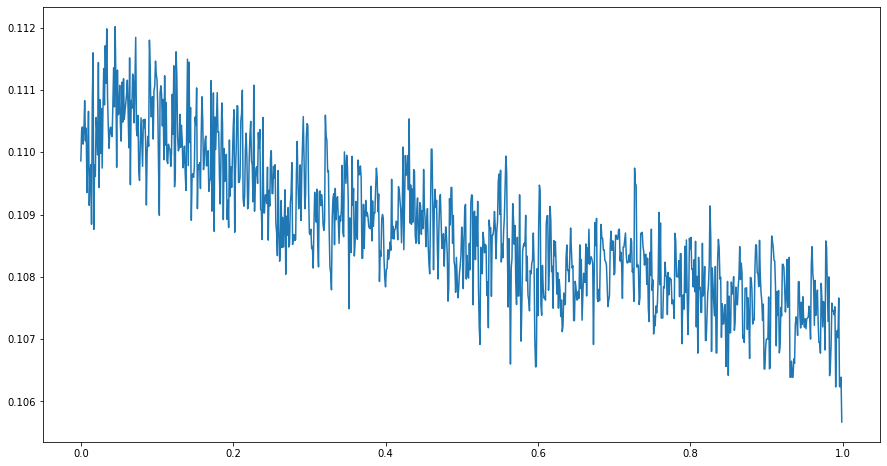

In [201]:
# Ridge
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

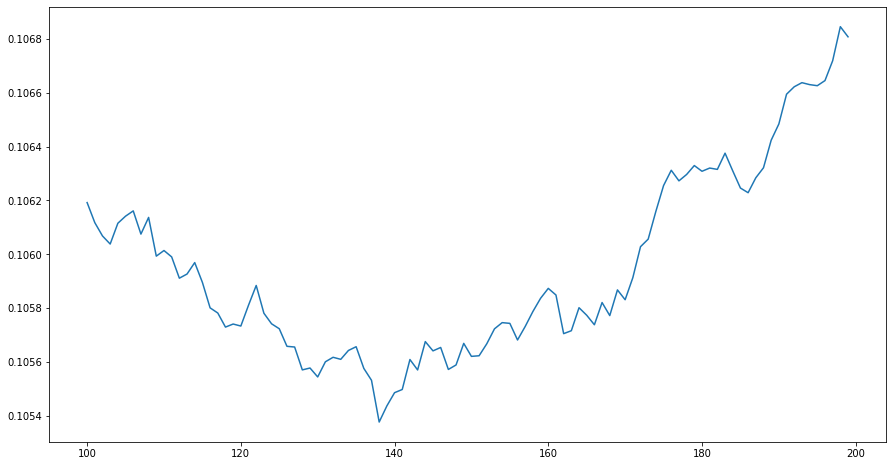

In [124]:
# estimators
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

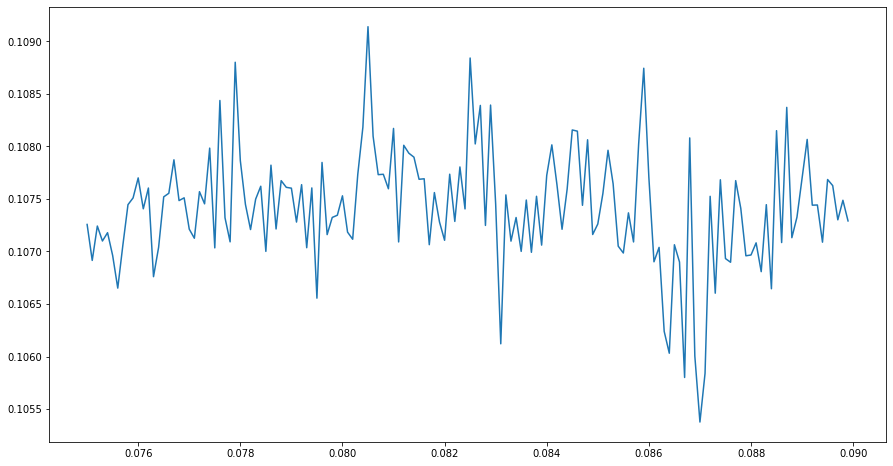

In [134]:
# Learning rate
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

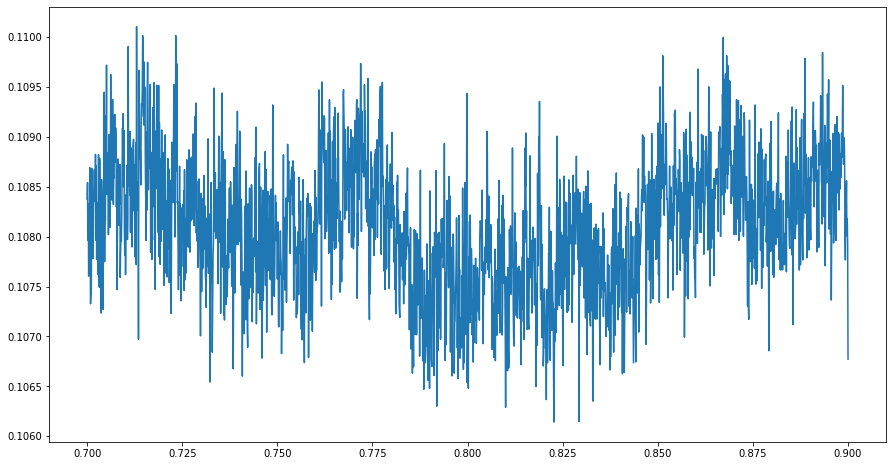

In [98]:
# subsample
plt.figure(figsize=(15,8))
plt.plot(estimate,scores2)
plt.show()

In [269]:
min(scores2)

0.10537710664612669

In [263]:
mint = dict(zip(scores2,estimate))
mint[min(mint.keys())]


{0.10537710664612669: 1,
 0.10746983148507616: 2,
 0.10792365435565611: 3,
 0.10860639577621177: 4,
 0.1085261164266241: 5,
 0.10873785838609265: 6,
 0.11089374663159669: 7,
 0.11062089808640109: 8,
 0.11113516984567647: 9}

In [210]:
# from xgboost import XGBRegressor

xg = XGBRegressor(learning_rate= 0.08700000000000034, n_estimators= 138, subsample= 0.8226999999999864, reg_lambda=0.999)
xg.fit(filter_x_train, filter_y_train)
preds = xg.predict(filter_x_test)

rmse = np.sqrt(MSE(filter_y_test, preds))
xg.score(filter_x_test, filter_y_test)*100

66.34462839094675

In [273]:
rmse

0.3246184068520391

In [271]:
xg.score(filter_x_train, filter_y_train)*100

79.32205133791975

In [62]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': [0.092, 0.],
    'n_estimators': [120,130,140,150],
    'subsample': [0.89,0.9,0.91]
}


xg = XGBRegressor()
grids = GridSearchCV(estimator=xg, param_grid=parameters,
                    scoring='neg_mean_squared_error',
                    cv=5, verbose=1)
grids.fit(filter_x_train, filter_y_train)
# preds = xg.predict(filter_x_test)
grids.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'learning_rate': 0.094, 'n_estimators': 140, 'subsample': 0.9}

In [64]:
print(grids.best_params_)

{'learning_rate': 0.094, 'n_estimators': 140, 'subsample': 0.9}
